In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import collections
import pandas as pd
from nltk import word_tokenize
import nltk
from nltk import pos_tag
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [35]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
# read generated story file
with open('/content/example.txt','r+',encoding='UTF-8') as f:
  t = f.read()
  print(t)

The year is 1910. Adolf Hitler, a struggling artist, has fought off dozens of assasination attemps by well meaning time travelers, but this one is different. This traveller doesn't want to kill Hitler, he wants to teach him to paint. He pulls off his hood to reveal the frizzy afro of Bob Ross.There he sat, twirling his personal, stylized mustache. It was avant garde, just like he wanted to be. The man, as he was so, just wanted a place in this world for his art. He continues to stare at the easel, thinking.

After a while he felt a firm, calming hand on his shoulder. He sighed, hanging his head wearily. "Are you yet another man come to end my life, if you can even see it that way?" The hand didn't answer, as it had no mouth. However, it's owner did, speaking the soft, assuaging tones that had come to make him famous.

"No sir. I've seen too much death and war to want to do another such thing. Instead, I have come as a tutor. Here, grab that 2 inch brush and dip it in some titanium whit

###Pre-precess

In [37]:
# tokenize words
w = word_tokenize(t)
print(w)

['The', 'year', 'is', '1910', '.', 'Adolf', 'Hitler', ',', 'a', 'struggling', 'artist', ',', 'has', 'fought', 'off', 'dozens', 'of', 'assasination', 'attemps', 'by', 'well', 'meaning', 'time', 'travelers', ',', 'but', 'this', 'one', 'is', 'different', '.', 'This', 'traveller', 'does', "n't", 'want', 'to', 'kill', 'Hitler', ',', 'he', 'wants', 'to', 'teach', 'him', 'to', 'paint', '.', 'He', 'pulls', 'off', 'his', 'hood', 'to', 'reveal', 'the', 'frizzy', 'afro', 'of', 'Bob', 'Ross.There', 'he', 'sat', ',', 'twirling', 'his', 'personal', ',', 'stylized', 'mustache', '.', 'It', 'was', 'avant', 'garde', ',', 'just', 'like', 'he', 'wanted', 'to', 'be', '.', 'The', 'man', ',', 'as', 'he', 'was', 'so', ',', 'just', 'wanted', 'a', 'place', 'in', 'this', 'world', 'for', 'his', 'art', '.', 'He', 'continues', 'to', 'stare', 'at', 'the', 'easel', ',', 'thinking', '.', 'After', 'a', 'while', 'he', 'felt', 'a', 'firm', ',', 'calming', 'hand', 'on', 'his', 'shoulder', '.', 'He', 'sighed', ',', 'hangin

In [38]:
# tagging the part of speech each word belongs to
tw = pos_tag(w)
print(tw)

[('The', 'DT'), ('year', 'NN'), ('is', 'VBZ'), ('1910', 'CD'), ('.', '.'), ('Adolf', 'NNP'), ('Hitler', 'NNP'), (',', ','), ('a', 'DT'), ('struggling', 'VBG'), ('artist', 'NN'), (',', ','), ('has', 'VBZ'), ('fought', 'VBN'), ('off', 'RP'), ('dozens', 'NNS'), ('of', 'IN'), ('assasination', 'NN'), ('attemps', 'NNS'), ('by', 'IN'), ('well', 'RB'), ('meaning', 'VBG'), ('time', 'NN'), ('travelers', 'NNS'), (',', ','), ('but', 'CC'), ('this', 'DT'), ('one', 'CD'), ('is', 'VBZ'), ('different', 'JJ'), ('.', '.'), ('This', 'DT'), ('traveller', 'NN'), ('does', 'VBZ'), ("n't", 'RB'), ('want', 'VB'), ('to', 'TO'), ('kill', 'VB'), ('Hitler', 'NNP'), (',', ','), ('he', 'PRP'), ('wants', 'VBZ'), ('to', 'TO'), ('teach', 'VB'), ('him', 'PRP'), ('to', 'TO'), ('paint', 'VB'), ('.', '.'), ('He', 'PRP'), ('pulls', 'VBZ'), ('off', 'IN'), ('his', 'PRP$'), ('hood', 'NN'), ('to', 'TO'), ('reveal', 'VB'), ('the', 'DT'), ('frizzy', 'JJ'), ('afro', 'NN'), ('of', 'IN'), ('Bob', 'NNP'), ('Ross.There', 'NNP'), ('he'

In [39]:
# extract the names and spaces from the story
name = []
for i in tw:
  if i[1] in ('NNP','NNPS'):
    name.append(i[0])
print(name)

['Adolf', 'Hitler', 'Hitler', 'Bob', 'Ross.There', 'Hitler', 'Adolf', 'Easy', 'Adolf', 'Xs', 'Adolf', 'Tell', 'Bob', 'Bob', 'Ross']


In [40]:
# do pre-process to story file

# Convert to lower case
t = t.lower()
# Replaces URLs with the word URL
t = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', t)
w = word_tokenize(t)

tmp = []
word_cleaned = []
for i in w:
# Remove punctuation
  i = i.strip('\'"?!,.():;``')
  # Convert more than 2 letter repetitions to 2 letter
  i = re.sub(r'(.)\1+', r'\1\1', i)
  # Remove - & '
  i = re.sub(r'(-|\')', '', i)
  # keep the initial of names and places in the story in capital letter 
  if i.capitalize() in name:
    i = i.capitalize()
  if i is not '':
    tmp.append(i)
print('tmp: ',tmp)

# remove stopwords
stop_words = nltk.corpus.stopwords.words('english')
for i in tmp:
  if i not in stop_words:
    word_cleaned.append(i)  
w = word_cleaned
print('final wordlist:',w)

tmp:  ['the', 'year', 'is', '1910', 'Adolf', 'Hitler', 'a', 'struggling', 'artist', 'has', 'fought', 'off', 'dozens', 'of', 'assasination', 'attemps', 'by', 'well', 'meaning', 'time', 'travelers', 'but', 'this', 'one', 'is', 'different', 'this', 'traveller', 'does', 'nt', 'want', 'to', 'kill', 'Hitler', 'he', 'wants', 'to', 'teach', 'him', 'to', 'paint', 'he', 'pulls', 'off', 'his', 'hood', 'to', 'reveal', 'the', 'frizzy', 'afro', 'of', 'Bob', 'ross.there', 'he', 'sat', 'twirling', 'his', 'personal', 'stylized', 'mustache', 'it', 'was', 'avant', 'garde', 'just', 'like', 'he', 'wanted', 'to', 'be', 'the', 'man', 'as', 'he', 'was', 'so', 'just', 'wanted', 'a', 'place', 'in', 'this', 'world', 'for', 'his', 'art', 'he', 'continues', 'to', 'stare', 'at', 'the', 'easel', 'thinking', 'after', 'a', 'while', 'he', 'felt', 'a', 'firm', 'calming', 'hand', 'on', 'his', 'shoulder', 'he', 'sighed', 'hanging', 'his', 'head', 'wearily', 'are', 'you', 'yet', 'another', 'man', 'come', 'to', 'end', 'my',

###Count words

In [41]:
# count the number of each word
word_count = {}
for i in w:
  if i in word_count:
    word_count[i] += 1
  else:
    word_count[i] = 1
print(word_count)

{'year': 1, '1910': 1, 'Adolf': 5, 'Hitler': 3, 'struggling': 1, 'artist': 1, 'fought': 1, 'dozens': 1, 'assasination': 1, 'attemps': 1, 'well': 1, 'meaning': 1, 'time': 2, 'travelers': 1, 'one': 1, 'different': 1, 'traveller': 1, 'nt': 4, 'want': 3, 'kill': 1, 'wants': 1, 'teach': 1, 'paint': 3, 'pulls': 1, 'hood': 2, 'reveal': 1, 'frizzy': 1, 'afro': 2, 'Bob': 3, 'ross.there': 1, 'sat': 1, 'twirling': 1, 'personal': 1, 'stylized': 1, 'mustache': 1, 'avant': 1, 'garde': 1, 'like': 2, 'wanted': 3, 'man': 5, 'place': 1, 'world': 1, 'art': 1, 'continues': 1, 'stare': 1, 'easel': 2, 'thinking': 1, 'felt': 1, 'firm': 2, 'calming': 1, 'hand': 3, 'shoulder': 2, 'sighed': 2, 'hanging': 1, 'head': 1, 'wearily': 1, 'yet': 1, 'another': 3, 'come': 3, 'end': 1, 'life': 1, 'even': 1, 'see': 2, 'way': 1, 'answer': 1, 'mouth': 1, 'however': 1, 'owner': 1, 'speaking': 1, 'soft': 1, 'assuaging': 1, 'tones': 1, 'make': 1, 'famous': 1, 'sir': 2, 'seen': 1, 'much': 1, 'death': 1, 'war': 1, 'thing': 2, 'i

### split the part of speech

In [42]:
# extract the noun 
noun = []
for i in tw:
  if i[1] in ('NN','NNS','NNP','NNPS'):
    noun.append(i[0])
print(noun)

['year', 'Adolf', 'Hitler', 'artist', 'dozens', 'assasination', 'attemps', 'time', 'travelers', 'traveller', 'Hitler', 'hood', 'afro', 'Bob', 'Ross.There', 'mustache', 'garde', 'man', 'place', 'world', 'art', 'easel', 'while', 'firm', 'hand', 'shoulder', 'head', 'man', 'life', 'way', 'hand', 'mouth', 'owner', 'tones', 'sir', 'death', 'war', 'thing', 'tutor', 'brush', 'dip', 'titanium', 'blue', 'Hitler', 'thing', 'man', 'blue', 'Adolf', 'brush', 'strokes', 'pallette', 'Easy', 'tiger', 'Adolf', 'time', 'bit', 'selection', 'stranger', 'shoulder', 'sky', 'ground', 'man', 'firm', 'hold', 'arm', 'Xs', 'so..', 'portion', 'left', 'hand', 'corner', 'layer', 'blue', 'Adolf', 'surprise', 'man', 'stroke', 'wash', 'water', 'devil', 'wood', 'point', 'adolf', 'surprise', 'easel', 'it..', 'woolen', 'hood', 'sir', 'Tell', 'figure', 'smile', 'squirrel', 'hair', 'Bob', 'Bob', 'Ross', 'painter']


In [43]:
# extract verb
verb = []
for i in tw:
  if i[1] in ('VB','VBD','VBG','VBN','VBP','VBZ'):
    verb.append(i[0])
print(verb)

['is', 'struggling', 'has', 'fought', 'meaning', 'is', 'does', 'want', 'kill', 'wants', 'teach', 'paint', 'pulls', 'reveal', 'sat', 'twirling', 'was', 'wanted', 'be', 'was', 'wanted', 'continues', 'stare', 'thinking', 'felt', 'calming', 'sighed', 'hanging', 'Are', 'come', 'end', 'see', 'did', 'answer', 'had', "'s", 'did', 'speaking', 'assuaging', 'had', 'come', 'make', "'ve", 'seen', 'want', 'do', 'have', 'come', 'grab', 'did', 'nodded', 'mix', 'have', 'did', 'trembling', 'try', 'keep', 'Painting', 'is', 'being', 'nodded', 'went', 'had', 'done', 'patted', 'let', 'see', 'paint', 'paint', 'let', 'allow', 'lies', 'Sighing', 'grabbed', 'lifted', 'have', 'do', 'is', 'was', 'filled', 'go', 'try', 'sighed', 'attempted', 'mimicked', 'go', 'brush', 'beat', 'help', 'turn', 'want', 'beat', 'figure', 'nodded', 'pulling', 'Do', 'Go', 'hurt', 'are', 'smiled', 'popped', "'m", 'heard', 'wanted', 'be']


In [44]:
# extract adjective
adj = []
for i in tw:
  if i[1] in ('JJ','JJR','JJS'):
    adj.append(i[0])
print(adj)


['different', 'frizzy', 'personal', 'stylized', 'avant', 'soft', 'famous', 'much', 'such', 'inch', 'white', 'prussian', 'Good', 'nice', 'pale', 'calm', 'steady', 'confident', 'slower', 'mixed', 'Good', 'nice', 'open', 'nice', 'tiny', 'top', 'nice', 'Ah', 'afro', 'bright']


In [45]:
# extract adverb
adv = []
for i in tw:
  if i[1] in ('RB','RBR','RBS'):
    adv.append(i[0])
print(adv)

['well', "n't", 'just', 'so', 'just', 'wearily', 'yet', 'even', "n't", 'However', 'too', 'Instead', 'Here', 'Now', 'together', 'rather', 'so', 'now', 'again', 'now', 'barely', 'soon', 'Now', 'ahead', 'almost', 'perfectly', 'ya', 'Now', 'there', "n't", "n't", 'first', 'then', 'maybe']


###Count number of word in each part of speech

In [67]:
# extract the count of noun
freq_noun = {}
for i in word_count.keys():
  if i in noun:
    freq_noun[i] = word_count[i]
print(freq_noun)

# count total number and proportion of noun in this text file
prop_noun = len(freq_noun)/len(tmp)
print('number of noun in this paper:',len(freq_noun))
print('The proportion of noun in the text is:',prop_noun)

# change to dataframe and sort them
df_noun = pd.DataFrame.from_dict(freq_noun, orient='index',columns=['count']).sort_values(by=['count'],ascending=False)
df_noun = df_noun.reset_index().rename(columns={'index':'noun'})
#df_noun = df_noun.sort_values(by=['count'],ascending=False)
df_noun

{'year': 1, 'Adolf': 5, 'Hitler': 3, 'artist': 1, 'dozens': 1, 'assasination': 1, 'attemps': 1, 'time': 2, 'travelers': 1, 'traveller': 1, 'hood': 2, 'afro': 2, 'Bob': 3, 'mustache': 1, 'garde': 1, 'man': 5, 'place': 1, 'world': 1, 'art': 1, 'easel': 2, 'firm': 2, 'hand': 3, 'shoulder': 2, 'head': 1, 'life': 1, 'way': 1, 'mouth': 1, 'owner': 1, 'tones': 1, 'sir': 2, 'death': 1, 'war': 1, 'thing': 2, 'tutor': 1, 'brush': 3, 'dip': 1, 'titanium': 1, 'blue': 3, 'strokes': 1, 'pallette': 1, 'Easy': 1, 'tiger': 1, 'bit': 1, 'selection': 1, 'stranger': 1, 'sky': 1, 'ground': 1, 'hold': 1, 'arm': 1, 'Xs': 1, 'portion': 1, 'left': 1, 'corner': 1, 'layer': 1, 'surprise': 2, 'stroke': 1, 'wash': 1, 'water': 1, 'devil': 1, 'wood': 1, 'point': 1, 'figure': 2, 'woolen': 1, 'Tell': 1, 'smile': 1, 'squirrel': 1, 'hair': 1, 'Ross': 1, 'painter': 1}
number of noun in this paper: 69
The proportion of noun in the text is: 0.148068669527897


,noun,count
0,Adolf,5
1,man,5
2,brush,3
3,Hitler,3
4,blue,3
...,...,...
64,dip,1
65,titanium,1
66,strokes,1
67,pallette,1


In [68]:
# extract the count of verb
freq_verb = {}
for i in word_count.keys():
  if i in verb:
    freq_verb[i] = word_count[i]
print(freq_verb)

# count total number and proportion of verb in this text file
prop_verb = len(freq_verb)/len(tmp)
print('number of verb in this paper:',len(freq_verb))
print('The proportion of verb in the text is:',prop_verb)

# change to dataframe and sort them
df_verb = pd.DataFrame.from_dict(freq_verb, orient='index',columns=['count']).sort_values(by=['count'],ascending=False)
df_verb = df_verb.reset_index().rename(columns={'index':'verb'})
df_verb

{'struggling': 1, 'fought': 1, 'meaning': 1, 'want': 3, 'kill': 1, 'wants': 1, 'teach': 1, 'paint': 3, 'pulls': 1, 'reveal': 1, 'sat': 1, 'twirling': 1, 'wanted': 3, 'continues': 1, 'stare': 1, 'thinking': 1, 'felt': 1, 'calming': 1, 'sighed': 2, 'hanging': 1, 'come': 3, 'end': 1, 'see': 2, 'answer': 1, 'speaking': 1, 'assuaging': 1, 'make': 1, 'seen': 1, 'grab': 1, 'brush': 3, 'nodded': 3, 'mix': 1, 'trembling': 1, 'try': 2, 'keep': 1, 'went': 1, 'done': 1, 'patted': 1, 'let': 2, 'allow': 1, 'lies': 1, 'grabbed': 1, 'lifted': 1, 'filled': 1, 'go': 3, 'attempted': 1, 'mimicked': 1, 'beat': 2, 'help': 1, 'turn': 1, 'figure': 2, 'pulling': 1, 'hurt': 1, 'smiled': 1, 'popped': 1, 'heard': 1}
number of verb in this paper: 56
The proportion of verb in the text is: 0.12017167381974249


,verb,count
0,nodded,3
1,want,3
2,brush,3
3,go,3
4,paint,3
5,come,3
6,wanted,3
7,try,2
8,beat,2
9,see,2


In [69]:
# extract the count of adj
freq_adj = {}
for i in word_count.keys():
  if i in adj:
    freq_adj[i] = word_count[i]
print(freq_adj)

# count total number and proportion of adj in this text file
prop_adj = len(freq_adj)/len(tmp)
print('number of adj in this paper:',len(freq_adj))
print('The proportion of adj in the text is:',prop_adj)

# change to dataframe and sort them
df_adj = pd.DataFrame.from_dict(freq_adj, orient='index',columns=['count']).sort_values(by=['count'],ascending=False)
df_adj = df_adj.reset_index().rename(columns={'index':'adj'})
df_adj

{'different': 1, 'frizzy': 1, 'afro': 2, 'personal': 1, 'stylized': 1, 'avant': 1, 'soft': 1, 'famous': 1, 'much': 1, 'inch': 1, 'white': 1, 'prussian': 1, 'nice': 4, 'pale': 1, 'calm': 1, 'steady': 1, 'confident': 1, 'slower': 1, 'mixed': 1, 'open': 1, 'tiny': 1, 'top': 1, 'bright': 1}
number of adj in this paper: 23
The proportion of adj in the text is: 0.04935622317596566


,adj,count
0,nice,4
1,afro,2
2,different,1
3,top,1
4,tiny,1
5,open,1
6,mixed,1
7,slower,1
8,confident,1
9,steady,1


In [70]:
# extract the count of adv
freq_adv = {}
for i in word_count.keys():
  if i in adv:
    freq_adv[i] = word_count[i]
print(freq_adv)

# count total number and proportion of adv in this text file
prop_adv = len(freq_adv)/len(tmp)
print('number of adv in this paper:',len(freq_adv))
print('The proportion of adv in the text is:',prop_adv)

# change to dataframe and sort them
df_adv = pd.DataFrame.from_dict(freq_adv, orient='index',columns=['count']).sort_values(by=['count'],ascending=False)
df_adv = df_adv.reset_index().rename(columns={'index':'adv'})
df_adv

{'well': 1, 'wearily': 1, 'yet': 1, 'even': 1, 'together': 1, 'rather': 1, 'barely': 1, 'soon': 1, 'ahead': 1, 'almost': 1, 'perfectly': 1, 'ya': 1, 'first': 1, 'maybe': 1}
number of adv in this paper: 14
The proportion of adv in the text is: 0.030042918454935622


,adv,count
0,well,1
1,wearily,1
2,yet,1
3,even,1
4,together,1
5,rather,1
6,barely,1
7,soon,1
8,ahead,1
9,almost,1


###create csv file to save word count statistics

In [79]:
with open('/content/example.csv', 'w', encoding='utf-8') as f2:
  pd.DataFrame(columns=['word_count_statistics']).to_csv(f2, index=False) # remove index here

  df_noun.to_csv(f2, mode='a+')
  df_verb.to_csv(f2, mode='a+')
  df_adj.to_csv(f2, mode='a+')
  df_adv.to_csv(f2, mode='a+')

df2 = pd.read_csv('/content/example.csv')
print(df2)


               word_count_statistics
NaN  noun                      count
0.0  Adolf                         5
1.0  man                           5
2.0  brush                         3
3.0  Hitler                        3
...                              ...
9.0  almost                        1
10.0 perfectly                     1
11.0 ya                            1
12.0 first                         1
13.0 maybe                         1

[166 rows x 1 columns]


###use word frequency calculation method to extract keywords

In [50]:
key_word_candidate = []
df_key = pd.DataFrame.from_dict(word_count, orient='index',columns=['count']).sort_values(by=['count'],ascending=False)

# select the most frequently fifteen words in this text file as candidate of key_words
for i in range(15):
  key_word_candidate.append(df_key.index[i])
print(key_word_candidate)

['Adolf', 'man', 'nice', 'nt', 'come', 'another', 'wanted', 'paint', 'hand', 'want', 'go', 'Bob', 'nodded', 'Hitler', 'brush']


In [54]:
Keyword_candidate = ",".join(key_word_candidate)
print(Keyword_candidate)

Adolf,man,nice,nt,come,another,wanted,paint,hand,want,go,Bob,nodded,Hitler,brush


In [63]:
with open('/content/example.txt','a+',encoding='UTF-8') as f:
  f.write("\n\nTotal number of words in this text file is : "+ str(len(tmp))+'\n')
  f.write('Key Word candidate: '+Keyword_candidate+'\n')
  t2 = f.read()
print(t2)

##Visualization

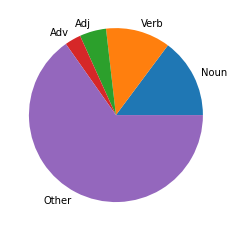

In [106]:
# create a part-of-speech pie chart 
other = 1 - prop_noun - prop_verb - prop_adj - prop_adv
labels ='Noun','Verb','Adj','Adv','Other'
fraces = [prop_noun,prop_verb,prop_adj,prop_adv,other]
plt.pie(x=fraces,labels= labels)
plt.savefig('/content/example_wordcount_piechart.jpg')
plt.show()


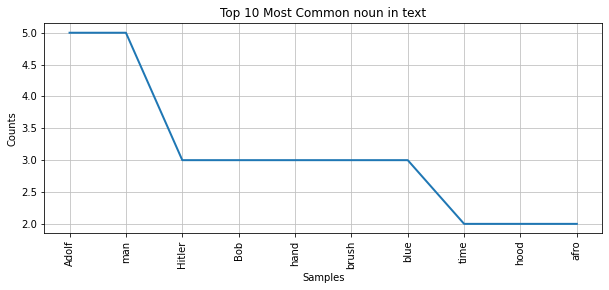

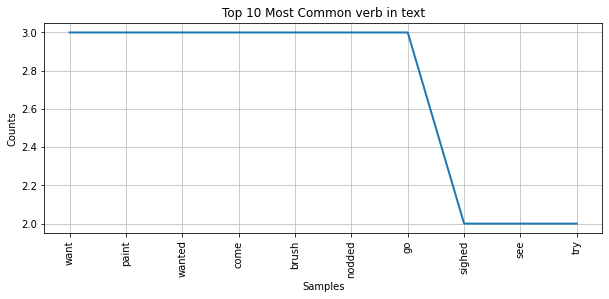

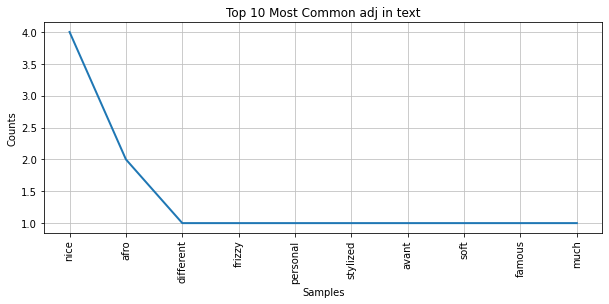

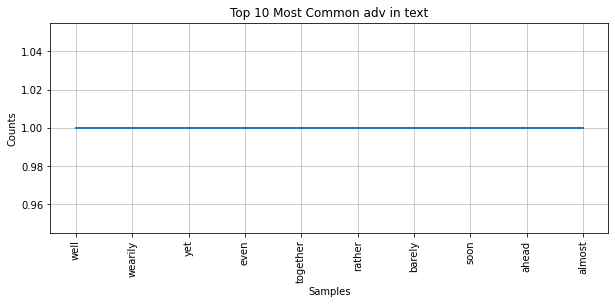

In [117]:
# use NLTK to generate figures for noun, verb, adj, adv
Freq_noun=nltk.FreqDist(freq_noun)
Freq_verb=nltk.FreqDist(freq_verb)
Freq_adj=nltk.FreqDist(freq_adj)
Freq_adv=nltk.FreqDist(freq_adv)

#show figures and save them as png. 
#Number of words on X-axes is configurable
fig = plt.figure(figsize = (10,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
Freq_noun.plot(10, title='Top 10 Most Common noun in text')
fig.savefig('/content/example_top10_noun.png', bbox_inches = "tight")

fig = plt.figure(figsize = (10,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
Freq_verb.plot(10, title='Top 10 Most Common verb in text')
fig.savefig('/content/example_top10_verb.png', bbox_inches = "tight")

fig = plt.figure(figsize = (10,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
Freq_adj.plot(10, title='Top 10 Most Common adj in text')
fig.savefig('/content/example_top10_adj.png', bbox_inches = "tight")

fig = plt.figure(figsize = (10,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
Freq_adv.plot(10, title='Top 10 Most Common adv in text')
fig.savefig('/content/example_top10_adv.png', bbox_inches = "tight")

plt.show()


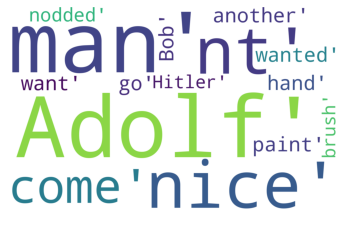

In [107]:
# use wordcloud to generate png for keywords candidate
wordcloud = WordCloud(
        background_color="white", # Set the background to white , default is black
        width=1500,              #Set width of figure
        height=960,              #Set height of figure
        margin=10               #Set margin of figure
        ).generate(str(key_word_candidate))
# generate figure
plt.imshow(wordcloud)
# remove axes
plt.axis("off")

fig.show()
# save figure as png
wordcloud.to_file('/content/example_keyword.png')